In [1]:
#FIUBA - 75.26 Simulacion
#2C 2019 - Trabajo final
#79979 - Gonzalez, Juan Manuel (juanmg0511@gmail.com)

#A pseudo-random numbers generator based on a novel 3D chaotic map with an application to color image encryption
#https://doi.org/10.1007/s11071-018-4390-z
#Pruebas sobre imagen encriptada

import os
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from scipy.stats import chisquare

In [2]:
#Apertura del archivo de imagen
base_path = "../images/"
filename = "lena_std_encrypted.tif"
im_original = Image.open(base_path + filename)
Io = list(im_original.getdata())
n = im_original.width
m = im_original.height

#Vectores con las componentes R,G,B de la imagen
Ir = [] 
Ig = []
Ib = []

Ir = [r[0] for r in Io]
Ig = [g[1] for g in Io]
Ib = [b[2] for b in Io]

Ir_Series = pd.Series(Ir)
Ig_Series = pd.Series(Ig) 
Ib_Series = pd.Series(Ib)

print("Opened file \"" + base_path + filename + "\", " + str(os.stat(base_path + filename).st_size) + " bytes read.")

Opened file "../images/lena_std_encrypted.tif", 786572 bytes read.


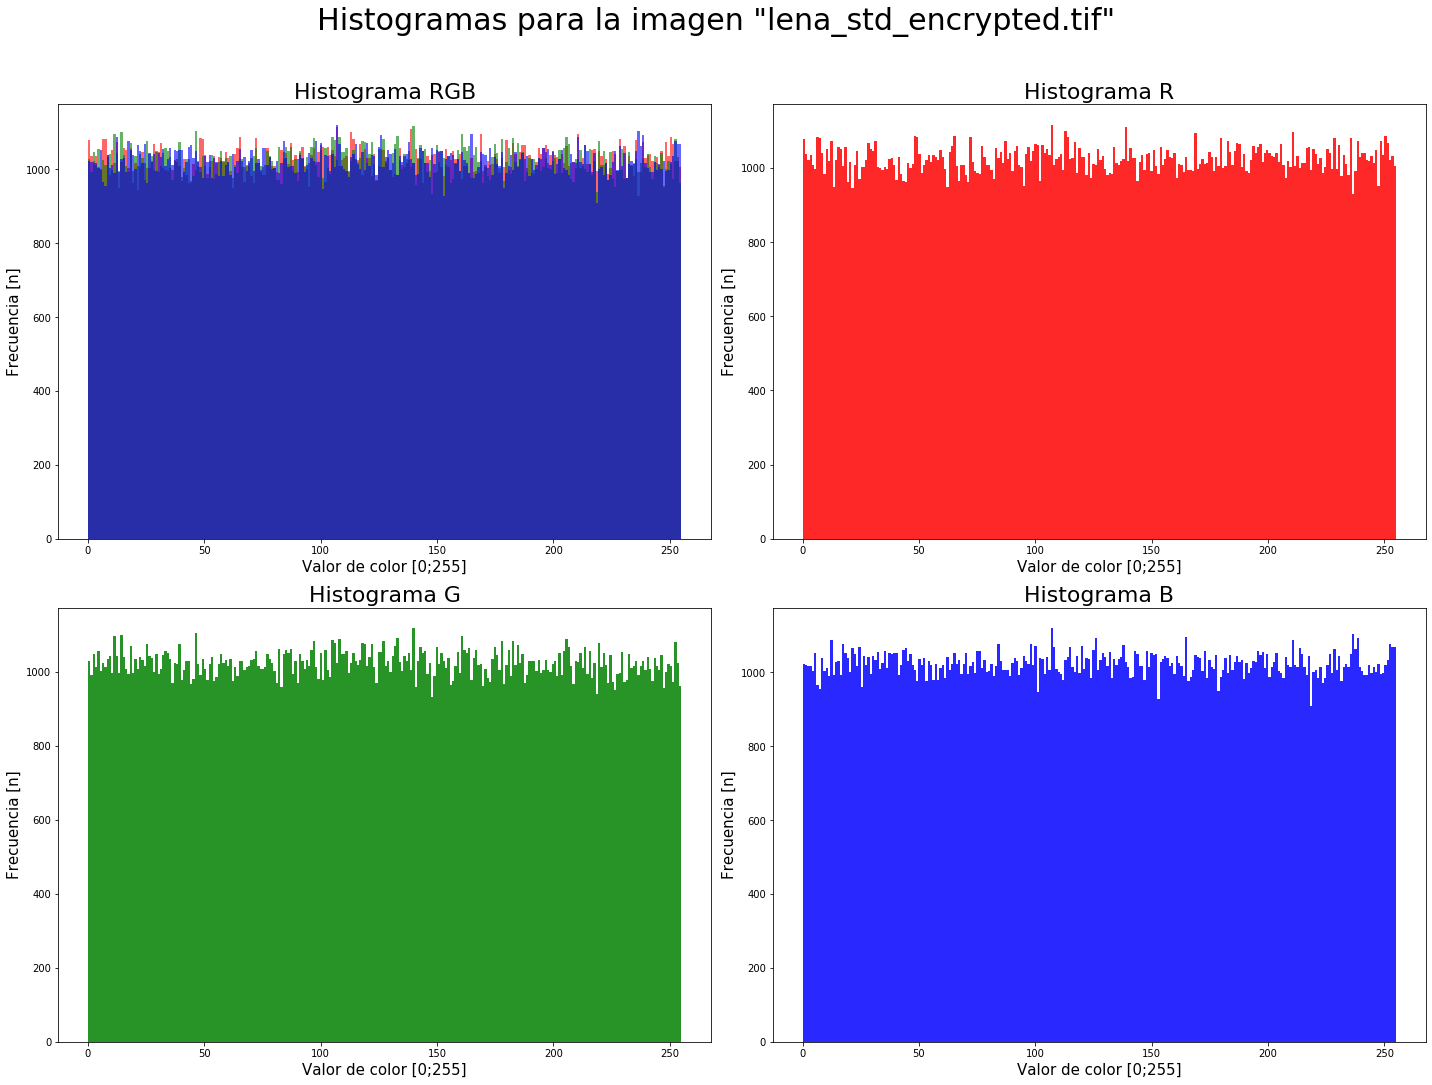

In [3]:
#Análisis de Histograma
#Generamos la visualización, sobre los datos 
#Tamaños de textos
figure_title_fs = 30
figure_sub_title_fs = 22
figure_labels_fs = 20 
figure_axis_fs = 15 
figure_legend_fs = 15
#Tamaño de la visualización, hoja A4
fig = plt.figure()
fig.set_size_inches(20,30)
fig.suptitle('Histogramas para la imagen \"' + filename + '\"', fontsize=figure_title_fs)

#Histogramas superpuestos
ax1 = fig.add_subplot(4,2,1)
ax1 = Ir_Series.plot.hist(bins=256, color='red',alpha=0.6)
ax1 = Ig_Series.plot.hist(bins=256, color='green',alpha=0.6)
ax1 = Ib_Series.plot.hist(bins=256, color='blue',alpha=0.6)
ax1.set_title("Histograma RGB", fontsize=figure_sub_title_fs)
ax1.set_xlabel("Valor de color [0;255]",fontsize=figure_axis_fs) 
ax1.set_ylabel("Frecuencia [n]", fontsize=figure_axis_fs)

#Histograma rojo
ax2 = fig.add_subplot(4,2,2)
ax2 = Ir_Series.plot.hist(bins=256, color='red',alpha=0.6)
(Hr, Binsr, Patchesr) = plt.hist(Ir_Series, bins=256, color='red',alpha=0.6)
ax2.set_title("Histograma R", fontsize=figure_sub_title_fs)
ax2.set_xlabel("Valor de color [0;255]",fontsize=figure_axis_fs) 
ax2.set_ylabel("Frecuencia [n]", fontsize=figure_axis_fs)

#Histogramas superpuestos
ax3 = fig.add_subplot(4,2,3)
ax3 = Ig_Series.plot.hist(bins=256, color='green',alpha=0.6)
(Hg, Binsg, patchesg) = plt.hist(Ig_Series, bins=256, color='green',alpha=0.6)
ax3.set_title("Histograma G", fontsize=figure_sub_title_fs)
ax3.set_xlabel("Valor de color [0;255]",fontsize=figure_axis_fs) 
ax3.set_ylabel("Frecuencia [n]", fontsize=figure_axis_fs)

#Histogramas superpuestos
ax4 = fig.add_subplot(4,2,4)
ax4 = Ib_Series.plot.hist(bins=256, color='blue',alpha=0.6)
(Hb, Binsb, Patchesb) = plt.hist(Ib_Series, bins=256, color='blue',alpha=0.6)
ax4.set_title("Histograma B", fontsize=figure_sub_title_fs)
ax4.set_xlabel("Valor de color [0;255]",fontsize=figure_axis_fs) 
ax4.set_ylabel("Frecuencia [n]", fontsize=figure_axis_fs)

#Graficamos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [4]:
#Obtenemos los valores de χ² para los canales de la imagen
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

#χ² = sum[0,255](((o[i]-e[i])^2)/(e[i]))

print("χ² canal R: " + str(chisquare(Hr).statistic))
print("χ² canal G: " + str(chisquare(Hg).statistic))
print("χ² canal B: " + str(chisquare(Hb).statistic))

χ² canal R: 274.390625
χ² canal G: 284.408203125
χ² canal B: 231.07421875


In [ ]:
#Analisis de correlación de píxeles adyacentes